In [1]:
import cv2

In [4]:
img1 = cv2.imread(".\images\SRA.png")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread(".\images\watermark.png")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

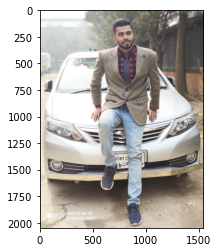

In [6]:
plt.imshow(img1)

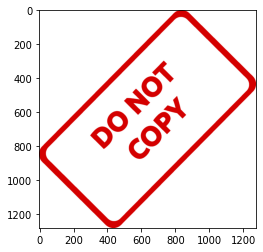

In [7]:
plt.imshow(img2)

In [8]:
img1.shape

(2048, 1536, 3)

In [9]:
img2.shape

(1280, 1277, 3)

Blending Images of same size

In [10]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

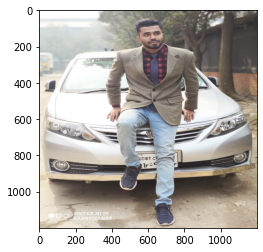

In [11]:
plt.imshow(img1)

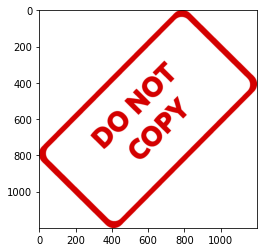

In [12]:
plt.imshow(img2)

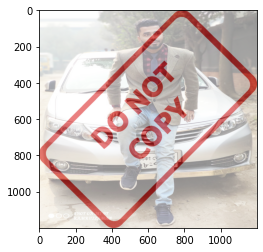

In [31]:
blended = cv2.addWeighted(src1=img1,alpha=0.5,src2=img2,beta=0.5,gamma=0)
plt.imshow(blended)

OVERLAY SMALL IMAGE ON TOP OF A LARGER IMAGES (NO BLENDING)
Numpy reassignment

In [32]:
img1 = cv2.imread(".\images\SRA.png")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread(".\images\watermark.png")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

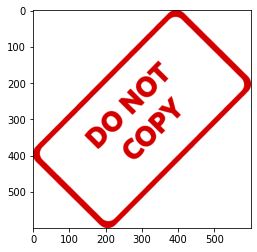

In [33]:
img2 = cv2.resize(img2,(600,600))
plt.imshow(img2)

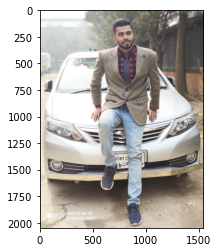

In [34]:
plt.imshow(img1)

In [35]:
large_img = img1
small_img = img2

In [36]:
x_offset = 0
y_offset = 0

In [39]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [40]:
small_img.shape

(600, 600, 3)

In [41]:
large_img[y_offset: y_end,x_offset:x_end] = small_img

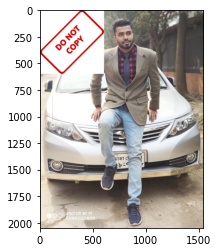

In [42]:
plt.imshow(large_img)

BLEND TOGATHER IMAGES OF DIFFRENT SIZE

In [43]:
img1 = cv2.imread(".\images\SRA.png")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread(".\images\watermark.png")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [44]:
img2 = cv2.resize(img2,(600,600))

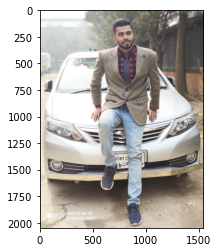

In [45]:
plt.imshow(img1)

In [46]:
img1.shape

(2048, 1536, 3)

In [47]:
x_offset = 1536 - 600
y_offset = 2048 - 600

In [48]:
img2.shape

(600, 600, 3)

In [49]:
rows,cols,channels = img2.shape

In [50]:
rows

600

In [51]:
cols

600

In [52]:
channels

3

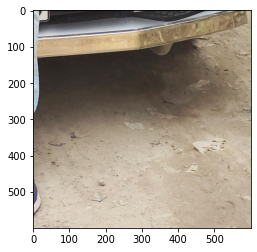

In [54]:
roi = img1[y_offset:2048,x_offset:1536]
plt.imshow(roi)

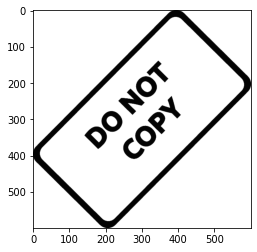

In [64]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap="gray")

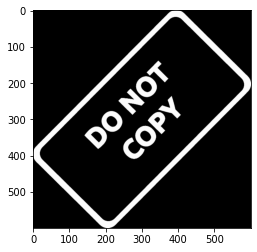

In [65]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap="gray")

In [66]:
mask_inv.shape

(600, 600)

In [67]:
import numpy as np

In [68]:
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [69]:
white_background.shape

(600, 600, 3)

White_Background

In [70]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

In [71]:
bk.shape

(600, 600, 3)

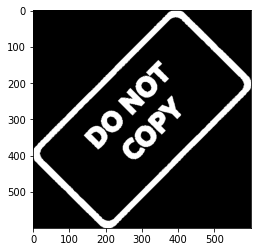

In [72]:
plt.imshow(bk)

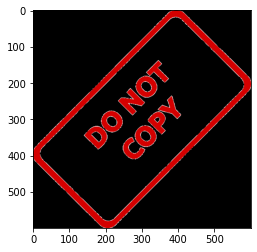

In [74]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)
plt.imshow(fg)

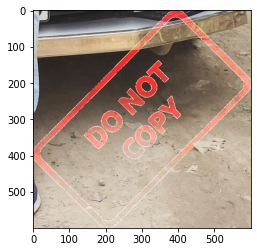

In [75]:
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

In [76]:
large_img = img1
small_img = final_roi

In [77]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

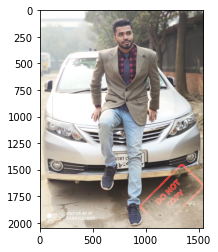

In [78]:
plt.imshow(large_img)